# Plot Group Traces
**Description:** This notebook visualizes the signals for all embryos within a group (across experiments). 

* All raw signals (active and structural)
* All dff traces
* All spectrograms

## Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import matplotlib as mpl

from pasna_analysis import Experiment, ExperimentConfig, myplots

## Load Data

Specify the location of the data by editing `folder` and entering experiments. All of the embryos in those experiments will be processed togehter.

In [2]:
folder = '25C'
group_config  = {
    '20240611_25C': ExperimentConfig(first_peak_threshold=30, to_exclude=[4,12,13,15,17,18,19,21,23]), 
    '20240919_25C': ExperimentConfig(first_peak_threshold=30, to_exclude=[5,6,9,10,11,16]),
    '20250404_wt': ExperimentConfig(first_peak_threshold=30, to_exclude=[7,9,15,19,23,26,28,36,39,43,45,50,53])
}

all_embryos = []
for exp, config in group_config.items():
    exp_path = Path.cwd().parent.joinpath('data', folder, exp)
    experiment_object = Experiment(exp_path, first_peak_threshold=config.first_peak_threshold, 
        to_exclude=config.to_exclude, dff_strategy='local_minima', hatches=True)
    all_embryos.extend(experiment_object.embryos.values())

First peak detected before 30 mins. Skipping emb5..
First peak detected before 30 mins. Skipping emb9..
First peak detected before 30 mins. Skipping emb15..
First peak detected before 30 mins. Skipping emb18..
First peak detected before 30 mins. Skipping emb21..
First peak detected before 30 mins. Skipping emb23..
First peak detected before 30 mins. Skipping emb27..
First peak detected before 30 mins. Skipping emb35..
First peak detected before 30 mins. Skipping emb46..


## Configure Plot Style

Customize the Matplotlib plots with rcParams. For a full list of parameters see [matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#default-values-and-styling)

In [3]:
fig_width = 20
subplots_rc = {
    'figure.frameon': False,
    'figure.figsize': [fig_width, 8],

    'lines.linewidth': 2,

    'font.family': 'Arial',
    'font.size': fig_width/1.5,

    'xtick.major.size': 10, # length
    'xtick.major.width': 2,
    'ytick.major.size': 10, # length
    'ytick.major.width': 2,

    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelpad': 10,
    'axes.linewidth': 2.5
}

mymap = mpl.colormaps['turbo']
mymap.set_over('black')

## Plot Raw Signals

Plots the raw activity signal (right) and structural signal (left).

**plot_raw_signals**

Has no optional parameters.

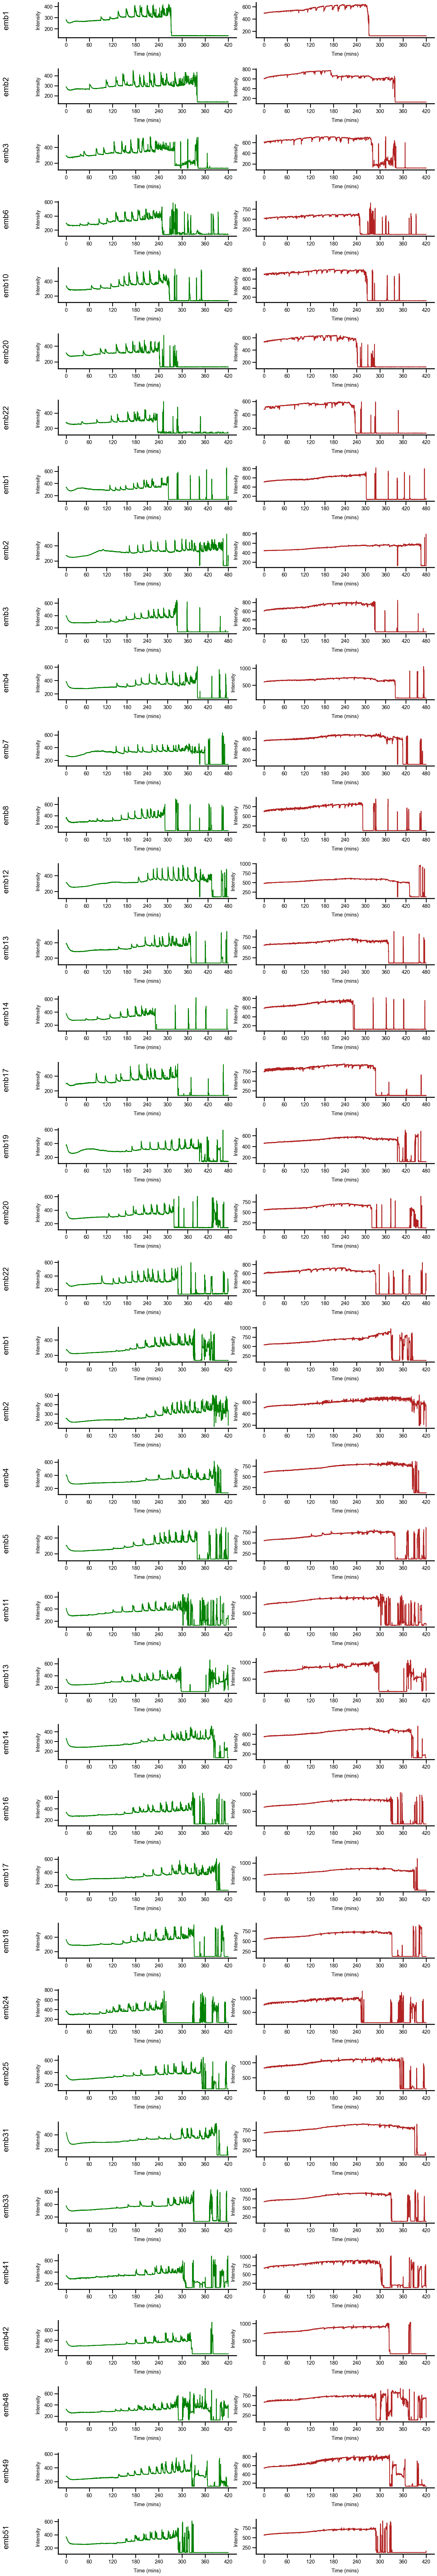

In [4]:
myplots.plot_raw_signals(all_embryos, subplots_rc)

## Plot All DFF Traces

Plots the dff traces for all embryos.

**preprocess_multi_embryos**

optional parameters:
* duration: target number of frames to include
* onset_pad: number of frames to include before onset

**plot_traces**

optional parameters:
* color: line color
* xmin: x-axis minimum in minutes
* xmax: x-axis maximum in minutes
* ymin: y-axis minimum in minutes
* ymax: y-axis maximum in minutes

/Users/alanaevora/Documents/Duke/code/pasna_analysis/pasna_analysis/trace.py:299: PeakPropertyWarning: some peaks have a prominence of 0
  _, _, start_idxs, end_idxs = spsig.peak_widths(
/Users/alanaevora/Documents/Duke/code/pasna_analysis/pasna_analysis/trace.py:299: PeakPropertyWarning: some peaks have a width of 0
  _, _, start_idxs, end_idxs = spsig.peak_widths(


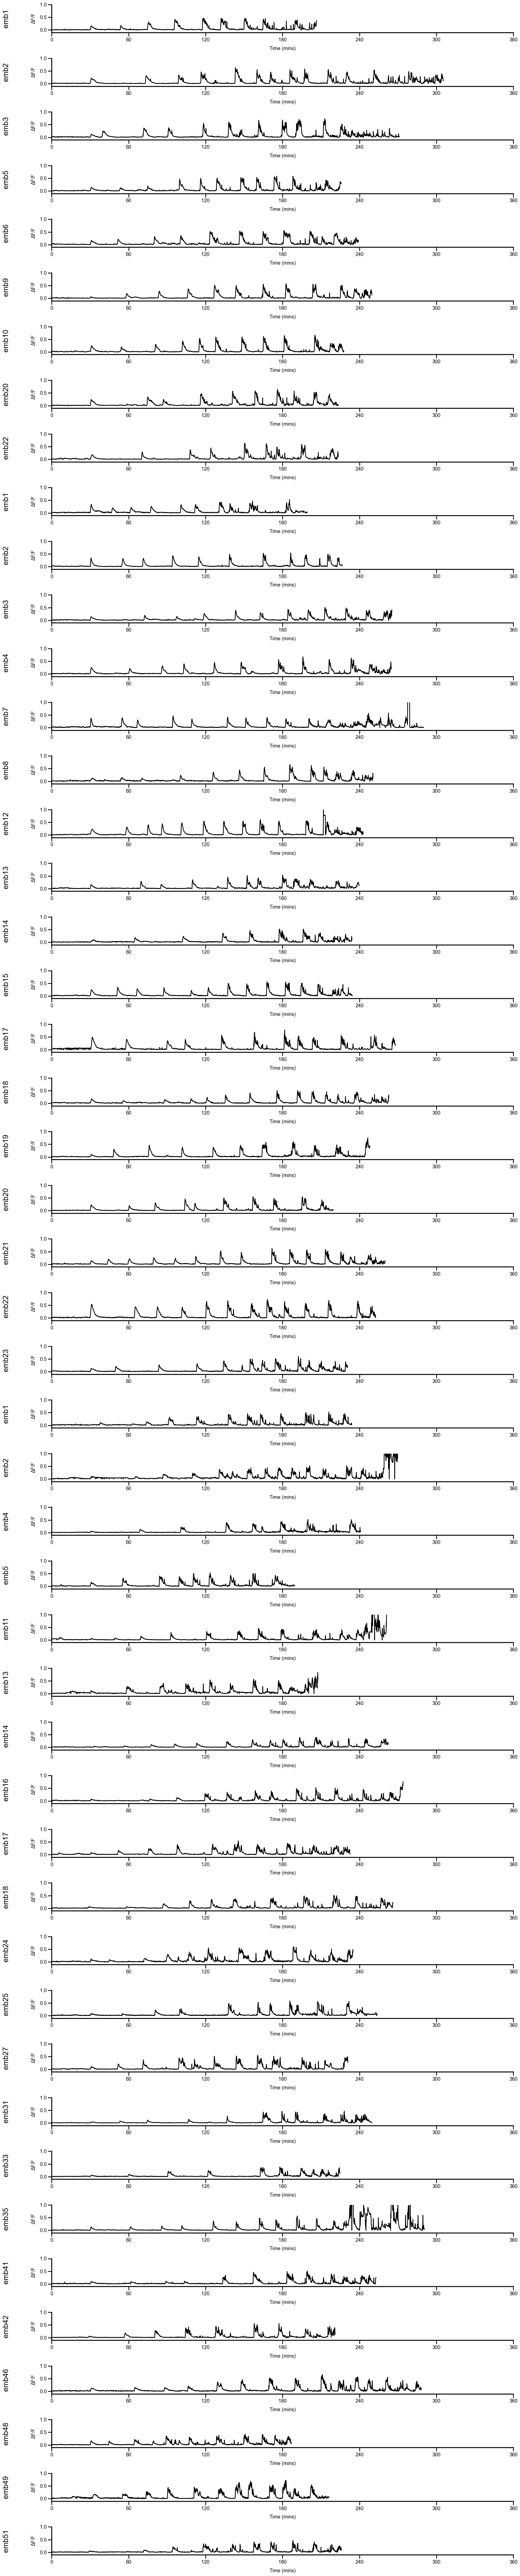

In [5]:
names, times, dffs = preprocess_multi_dffs(all_embryos)
plot_traces(names, times[0], dffs, subplots_rc, ymax=1)

## Plot All Spectrograms

Preprocesses all dffs to a standardized length, then plots the magnitude of its STFT over time. The x-axis displays time (columns), y-axis displays frequency (rows), and color displays intensity. 

**preprocess_multi_dffs** 

optional parameters:
* duration: target number of frames to include
* onset_pad: number of frames to include before onset


**calculate_multi_STFTs**

optional parameters:
* fs: sampling rate
* fft_size: num frames in each segment
* noverlap: num frames to overlap between segements

**plot_specs** 

optional parameters:
* display_colorbar: True to display, False to hide
* xmin: x-axis minimum in minutes
* xmax: x-axis maximum in minutes
* ymin: y-axis minimum in minutes
* ymax: y-axis maximum in minutes

In [6]:
names, times, dffs = preprocess_multi_dffs(all_embryos)
f, t, mags = calculate_multi_STFTs(dffs)
plot_specs(names, f, t, mags, mymap, subplots_rc, display_colorbar=False)

TypeError: Image data of dtype complex128 cannot be converted to float

## Plot Average Spectrogram

Preprocesses all dffs to a standardized length, then plots the average magnitude of their STFTs over time. The x-axis displays time (columns), y-axis displays frequency (rows), and color displays intensity. 

**preprocess_multi_dffs** 

optional parameters:
* duration: target number of frames to include
* onset_pad: number of frames to include before onset

**calculate_multi_STFTs**

optional parameters:
* fs: sampling rate
* fft_size: num frames in each segment
* noverlap: num frames to overlap between segements

**plot_spec** 

optional parameters:
* display_colorbar: True to display, False to hide
* xmin: x-axis minimum in minutes
* xmax: x-axis maximum in minutes
* ymin: y-axis minimum in minutes
* ymax: y-axis maximum in minutes

N=48


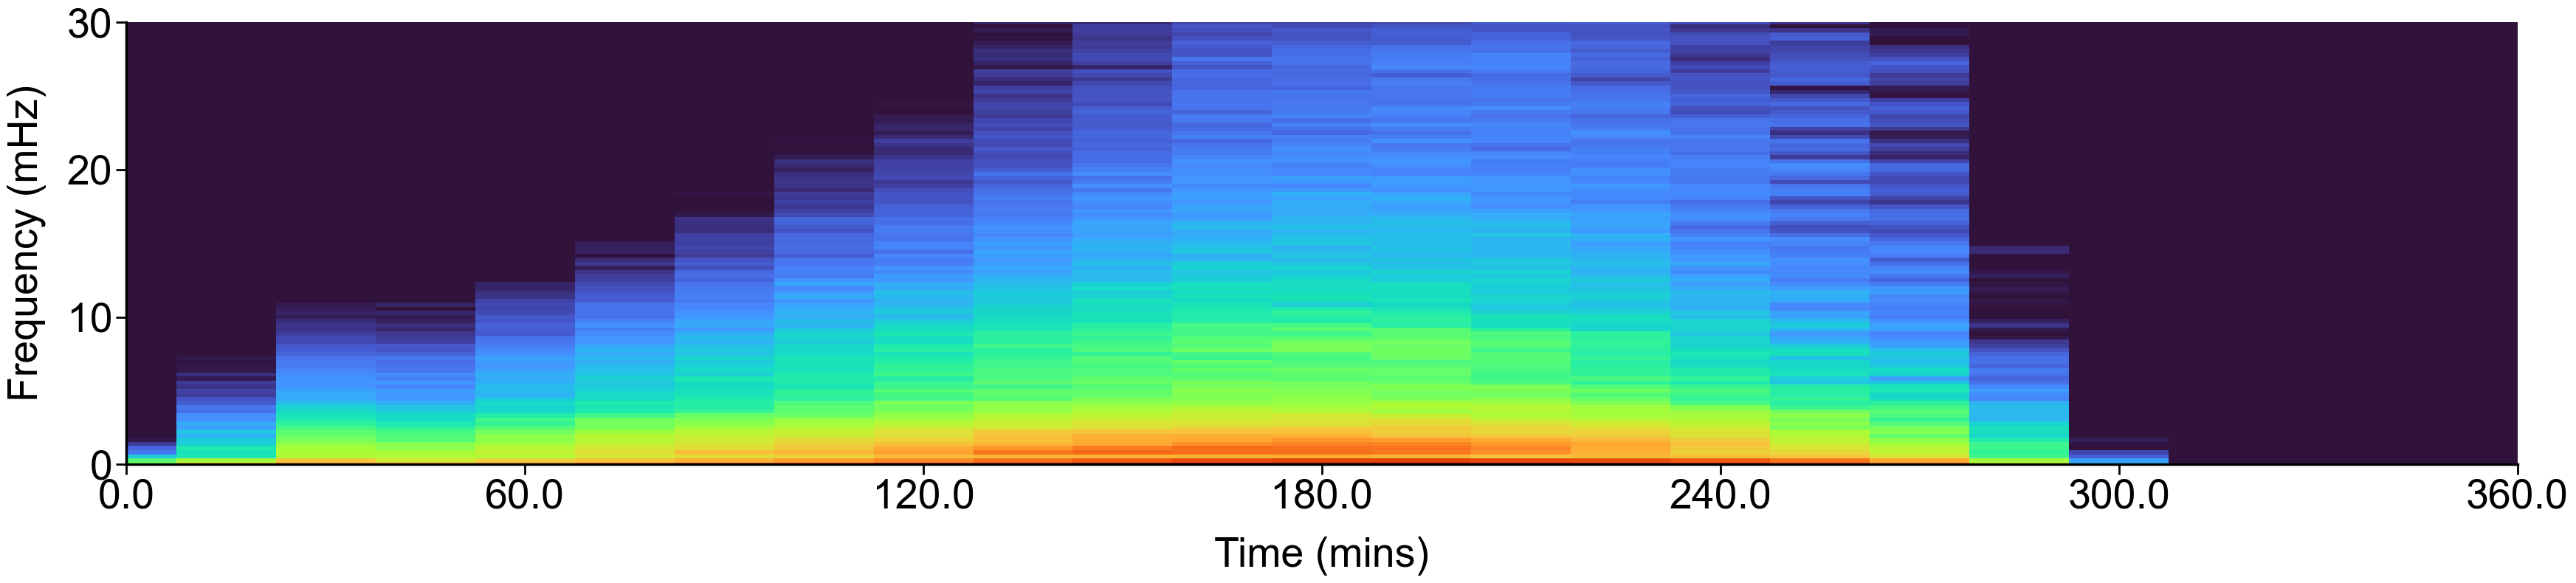

In [8]:
print(f'N={len(all_embryos)}')

names, times, dffs = preprocess_multi_dffs(all_embryos)
f, t, Zxxs = calculate_multi_STFTs(dffs)
stft_magnitudes = np.abs(Zxxs)
avg_magnitude = np.mean(stft_magnitudes, axis=0)
plot_spec(f, t, avg_magnitude, mymap, spec_rc, display_colorbar=False)